In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Identificador de placas

## Imagen de prueba

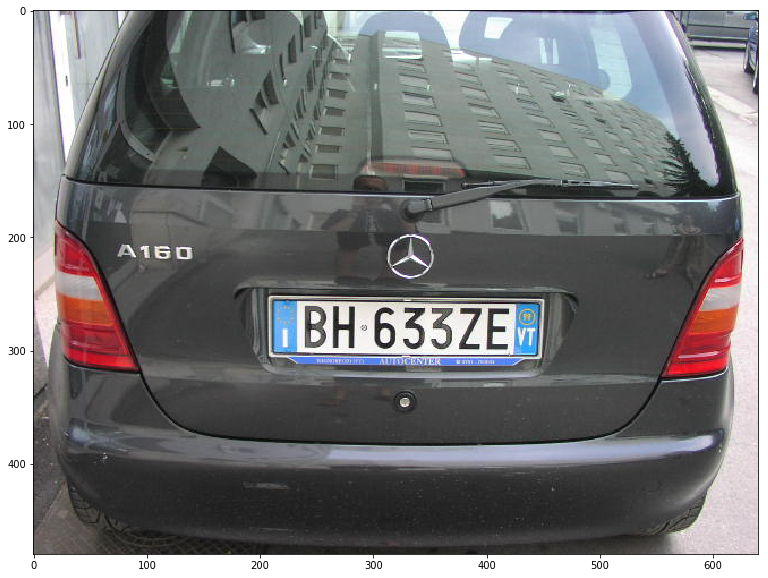

In [2]:
img = cv2.imread('P6070001.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.show()

Primero, encontramos el equivalente del color blanco en RGB en HSV

In [4]:
white = np.uint8([[[255,255,255]]])

white_hsv = cv2.cvtColor(white, cv2.COLOR_RGB2HSV)

print("White HSV:", white_hsv)

White HSV: [[[  0   0 255]]]


Luego, usamos ese valor para aislar las zonas de la imagen con tonos similares

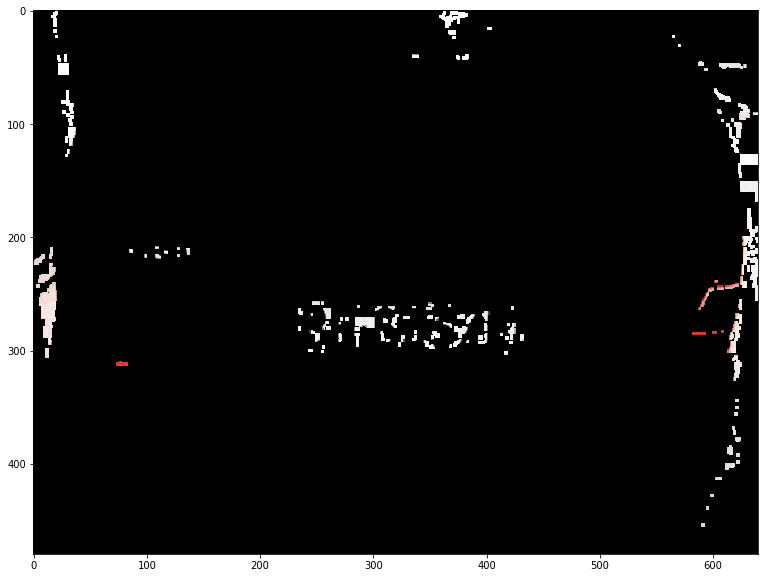

In [5]:
lower_white = np.array([0, 0, 230])
upper_white = np.array([10, 255, 255])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(img_hsv, lower_white, upper_white)
mask = cv2.GaussianBlur(mask, (3,3), 0)

res = cv2.bitwise_and(img_rgb, img_rgb, mask = mask)

plt.figure(figsize=(20, 10))
plt.imshow(res)
plt.show()

Se pueden observar tonos rojizos, esto se debe a que, en el espacio de color HSV, el blanco se obtiene por la saturación en vez del ángulo, por lo que siempre va a existir un tono por defecto.

El objetivo de identificar los colores es el de tener unas coordenadas que nos permitan recortar la parte de la placa de una imagen. Por lo tanto, al resultado se convierte en escala de grises y se le aplica un filtro gaussiano para recortar las zonas innecesarias.

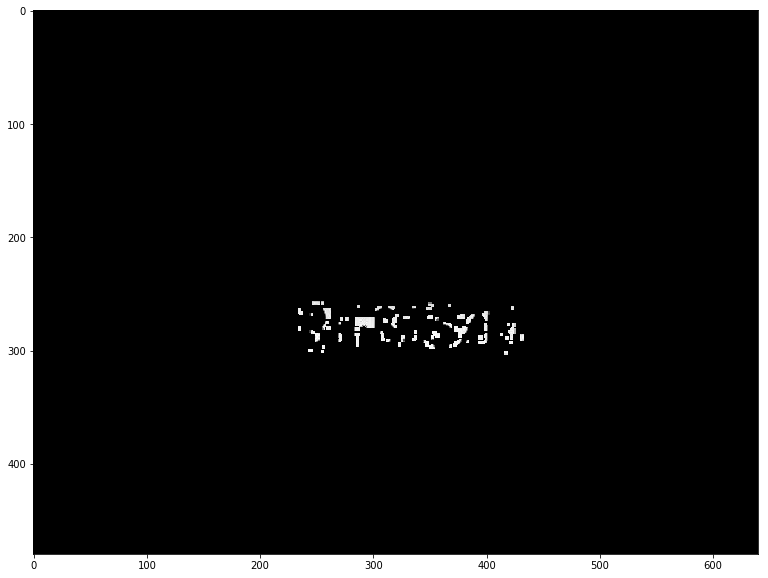

In [10]:
row, col, _ = img.shape
pad = col - row

x = cv2.getGaussianKernel(row, 100)
gaussian = x * x.T
superGaussian = gaussian

for i in range(0, row):
    for j in range(0, row):
        if gaussian[i][j] < 0.000005:
            superGaussian[i][j] = 0
        else:
            superGaussian[i][j] = 1

mask = np.zeros((row, col))
mask[:row,pad//2:pad//2+row] = superGaussian

# Applying filters
img_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
img_gray = img_gray * mask
# Printing
plt.figure(figsize=(20, 10))
plt.imshow(img_gray, 'gray')
plt.show()

Se obtienen las coordenadas de la placa

True
False
234 257


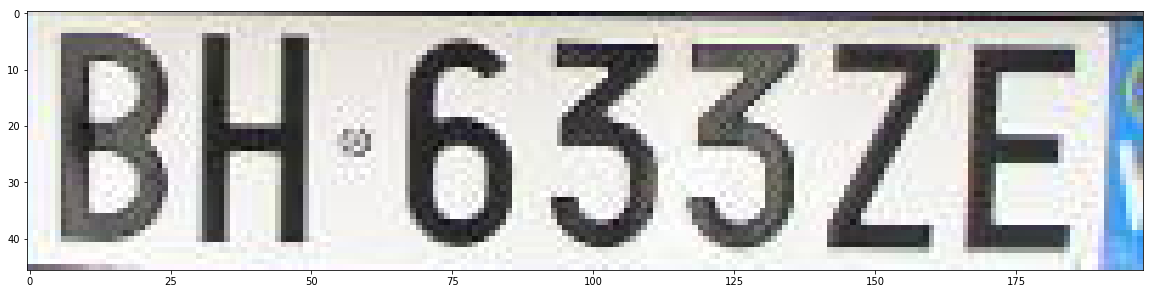

In [32]:
c0, c1 = col, 0
r0, r1 = row, 0

print(img_gray[i][j] < c0)
print(img_gray[i][j] != 0)

for i in range(0, row):
    for j in range(0, col):
        if j < c0 and img_gray[i][j] != 0:
            c0 = j
        if j > c1 and img_gray[i][j] != 0:
            c1 = j
        if i < r0 and img_gray[i][j] != 0:
            r0 = i
        if i > r1 and img_gray[i][j] != 0:
            r1 = i
            
print(c0, r0)

recortado = img_rgb[r0:r1,c0:c1]
plt.figure(figsize=(20, 10))
plt.imshow(recortado)
plt.show()